## Introduction to Image Data with Python

This work covers basics computer vision introduction to image processing and manipulation with Python, matplotlib and OpenCV. Data set can be obtained through the link below.
https://www.kaggle.com/code/robikscube/working-with-image-data-in-python/input

## Install Libraries

In [7]:
!pip install pandas
!pip install numpy
!pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 297.7 kB/s eta 0:02:11
   ---------------------------------------- 0.1/38.8 MB 467.6 kB/s eta 0:01:23
   ---------------------------------------- 0.1/38.8 MB 500.5 kB/s eta 0:01:18
   ---------------------------------------- 0.2/38.8 MB 437.1 kB/s eta 0:01:29
   ---------------------------------------- 0.2/38.8 MB 627.5 kB/s eta 0:01:02
   ---------------------------------------- 0.3/38.8 MB 587.7 kB/s eta 0:01:06
    --------------------------------------- 0.5/38.8 MB 827.5 kB/s eta 0:00:47
    --------------------------------------- 0.6/38.8 MB 884.7 kB/s eta 0:00:44
    --------------------------------------- 0.6/38.8 MB 909.2 kB/s eta 0:00:43
    --------------------------------------- 0.7/38.8 MB 976.6 kB/s eta 0:00:40
    --------------------------------------- 0.7/38.8 MB 962.5 kB/s eta

## Load Libraries

In [8]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

## Read Images

In [17]:
cat_files = glob('C:/Users/Administrator/Desktop/dataset image processing/cat and dog/training_set/training_set/cats/*.jpg')
dog_files = glob('C:/Users/Administrator/Desktop/dataset image processing/cat and dog/training_set/training_set/dogs/*.jpg')

In [32]:
#compare shape of cv2 and matplotlib
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])

img_cv2.shape, img_mpl.shape



((287, 288, 3), (287, 288, 3))

In [38]:
img_cv2.min(), img_cv2.max()

(0, 255)

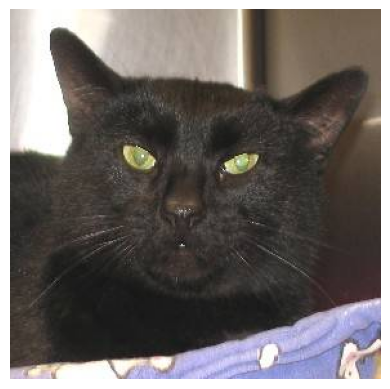

In [47]:
# Display the image
#fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(img_mpl)
plt.axis('off')  # Hide the axes
plt.show()

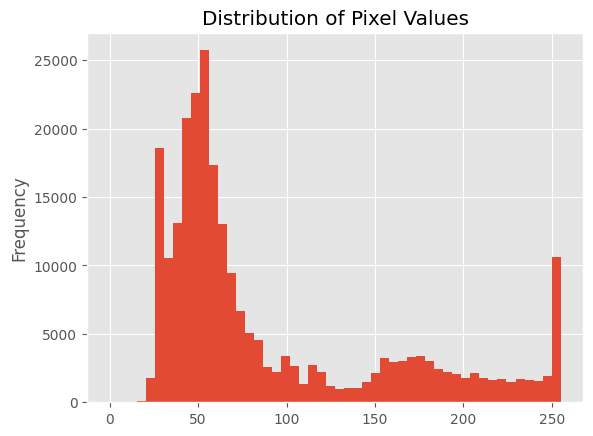

In [48]:
# Distribution of Pixel Values
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

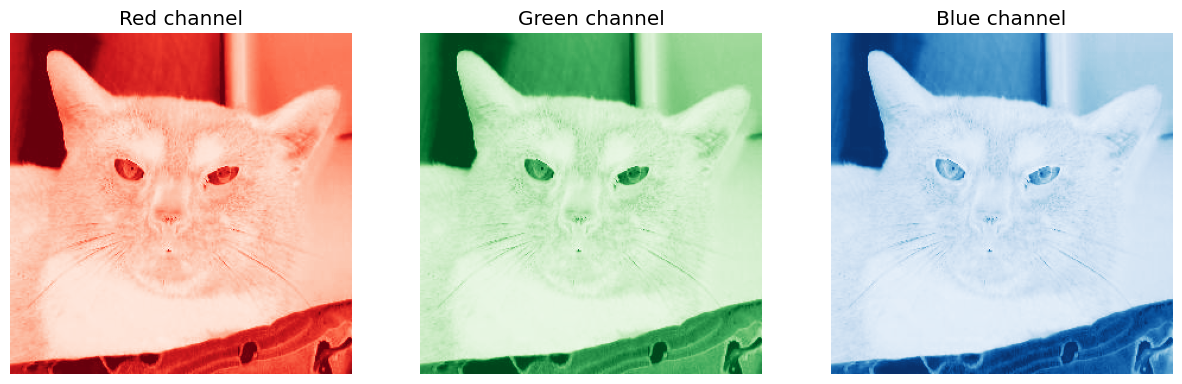

In [51]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

## Matplotlib vs cv2 Numpy Arrays.*
cv2 reads in channels a BGR 
*
matplotlib reads in channels as RGB

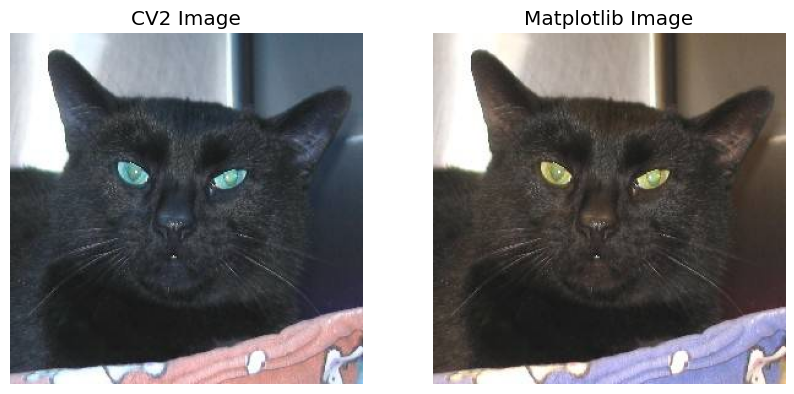

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

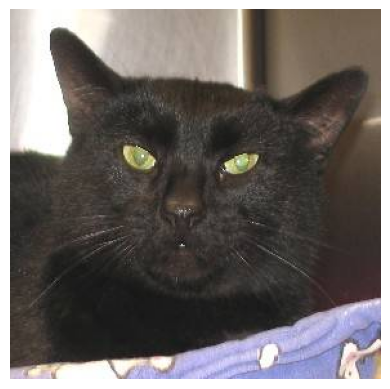

In [60]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

## Image Manipulation

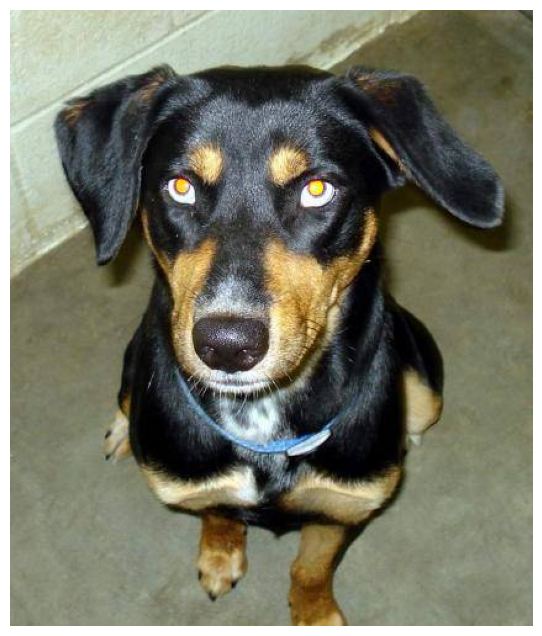

In [68]:
img = plt.imread(dog_files[30])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

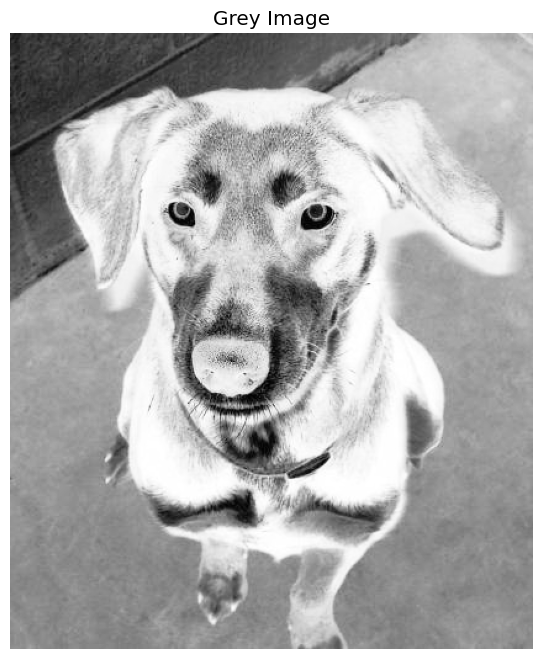

In [69]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

## Image Resizing and Scaling

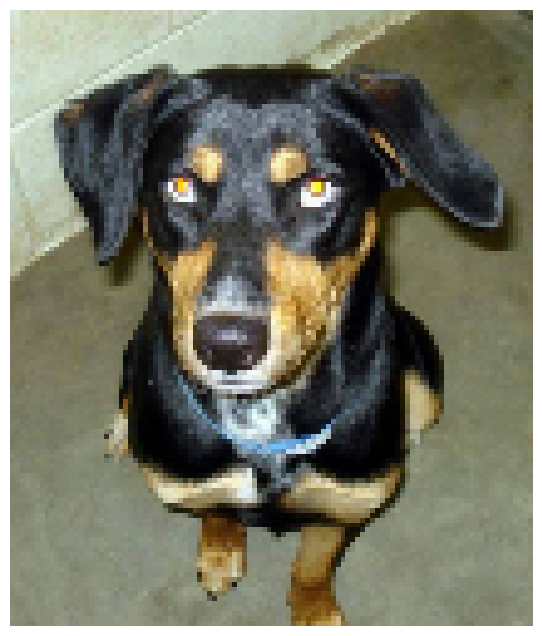

In [73]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

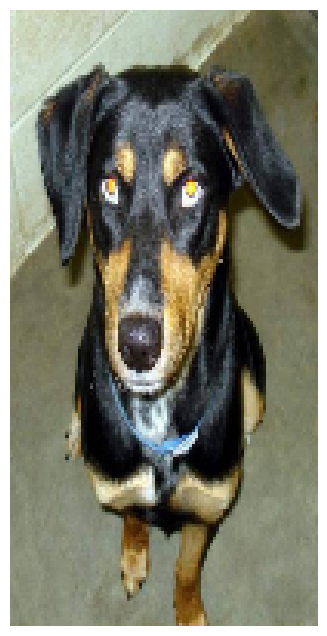

In [74]:
# Different Size
img_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

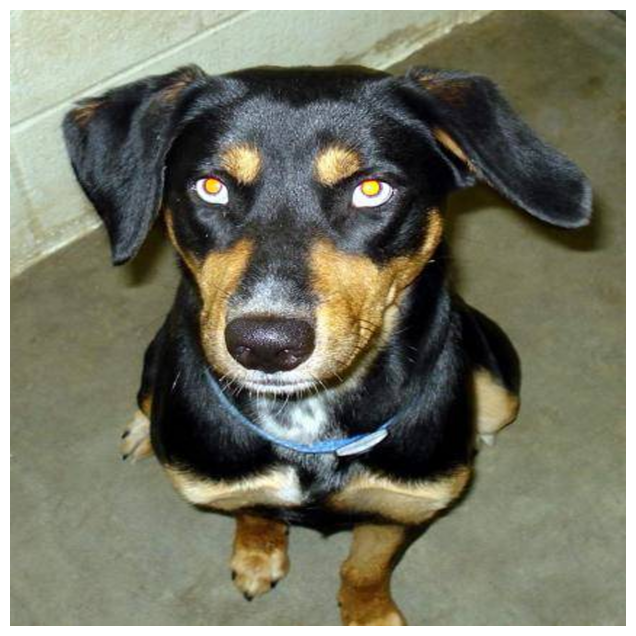

In [75]:
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

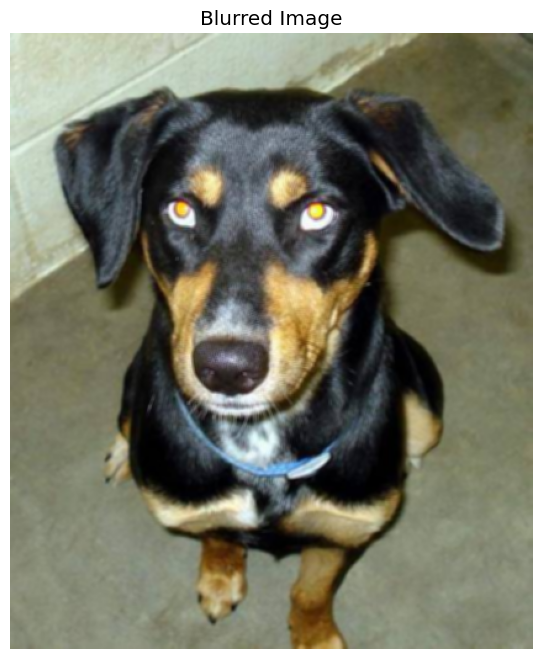

In [89]:
# Blurring the image
kernel_3x3 = np.ones((3,3), np.float32)/9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

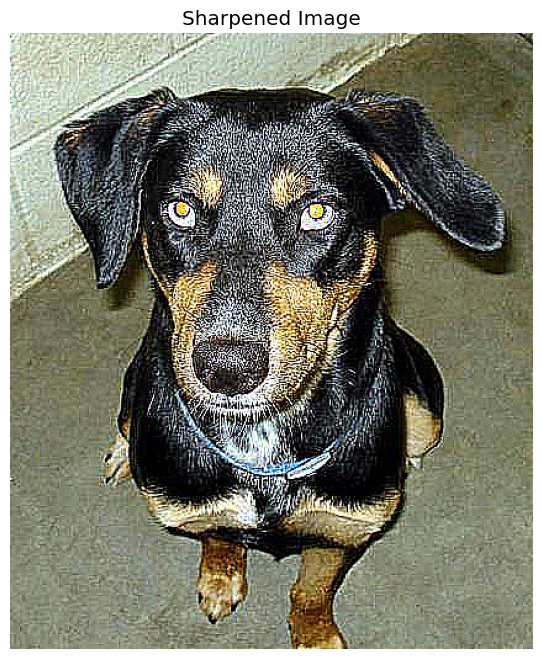

In [90]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()


In [91]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True